<a href="https://colab.research.google.com/github/Bonam24/APT3095/blob/main/DecisionTreeForPhishingWebsite.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
input_file = "/content/urlset.csv"
output_file = "/content/clean_urlset.csv"

with open(input_file, 'r', encoding='ISO-8859-1') as infile, open(output_file, 'w', encoding='ISO-8859-1') as outfile:
    header = infile.readline()
    outfile.write(header)
    num_columns = len(header.split(','))

    for line in infile:
        if len(line.split(',')) == num_columns:
            outfile.write(line)

# Read the cleaned CSV file
data = pd.read_csv(output_file, encoding='ISO-8859-1')


<ipython-input-121-7e00dc8d40a8>:14: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(output_file, encoding='ISO-8859-1')


In [ ]:
data.shape

(95543, 14)

In [ ]:
data

,domain,ranking,mld_res,mld.ps_res,card_rem,ratio_Rrem,ratio_Arem,jaccard_RR,jaccard_RA,jaccard_AR,jaccard_AA,jaccard_ARrd,jaccard_ARrem,label
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,10000000,1.0,0.0,18,107.611111,107.277778,0.000000,0.000000,0.000000,0.000000,0.800000,0.795729,1.0
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,10000000,0.0,0.0,11,150.636364,152.272727,0.000000,0.000000,0.000000,0.000000,0.000000,0.768577,1.0
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,10000000,0.0,0.0,14,73.500000,72.642857,0.000000,0.000000,0.000000,0.000000,0.000000,0.726582,1.0
3,mail.printakid.com/www.online.americanexpress....,10000000,0.0,0.0,6,562.000000,590.666667,0.000000,0.000000,0.000000,0.000000,0.000000,0.859640,1.0
4,thewhiskeydregs.com/wp-content/themes/widescre...,10000000,0.0,0.0,8,29.000000,24.125000,0.000000,0.000000,0.000000,0.000000,0.000000,0.748971,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95538,xbox360.ign.com/objects/850/850402.html,339,1.0,1.0,2,142.500000,141.000000,0.009009,0.009091,0.006536,0.006601,0.450980,0.846906,0.0
95539,games.teamxbox.com/xbox-360/1860/Dead-Space/,63029,1.0,0.0,3,114.000000,128.333333,0.002899,0.002577,0.002907,0.002584,0.750000,0.714623,0.0
95540,www.gamespot.com/xbox360/action/deadspace/,753,1.0,1.0,3,91.000000,101.333333,0.000000,0.003106,0.000000,0.000000,0.111111,0.648571,0.0
95541,en.wikipedia.org/wiki/Dead_Space_(video_game),6,1.0,1.0,4,682.000000,744.250000,0.033075,0.029412,0.030250,0.029145,0.809735,0.840323,0.0


In [ ]:
#check for samples of the data
data.sample(20)

,domain,ranking,mld_res,mld.ps_res,card_rem,ratio_Rrem,ratio_Arem,jaccard_RR,jaccard_RA,jaccard_AR,jaccard_AA,jaccard_ARrd,jaccard_ARrem,label
72562,home.earthlink.net/~swsirlin/apl.faq.html,1104,1.0,1.0,4,82.000000,76.500000,0.000000,0.000000,0.000000,0.000000,0.633333,0.801136,0.0
34414,www.leepoo.com.cn/js/?us.battle.net/login/en/?...,10000000,0.0,0.0,8,184.375000,183.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.761078,1.0
70312,www.cellspark.com/MidiSqueezer.html,10000000,0.0,0.0,2,132.500000,134.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.850694,0.0
72377,www2.latech.edu/~acm/helloworld/abc.html,105649,1.0,0.0,4,100.750000,90.500000,0.002421,0.002688,0.002433,0.002703,0.818182,0.742597,0.0
44872,shamane-cosmetiques.com/fr/jwplayer/Paypal.ca/...,10000000,0.0,0.0,6,149.666667,156.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.809852,1.0
56858,'www.aeco.ttu.edu/Publications/1998\%20Beltwid...,25665,1.0,1.0,5,87.200000,90.400000,0.000000,0.000000,0.000000,0.000000,0.428571,0.754941,0.0
55902,www.helsinki.fi/iehc2006/papers2/Thomson.pdf,19105,1.0,1.0,3,131.333333,134.000000,0.000000,0.000000,0.000000,0.000000,0.875000,0.761062,0.0
23865,www.vrolijkemamas.nl/images/NEYO/obiri.html?co...,10000000,0.0,0.0,14,79.214286,72.928571,0.000000,0.000000,0.000000,0.000000,0.000000,0.730301,1.0
80259,bugzillametrics.org/BugzillaMetrics/,10000000,0.0,0.0,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
45115,www-update-account-login-c0m.20.1656948824ty.1...,10000000,0.0,0.0,7,225.571429,237.714286,0.000000,0.000000,0.000000,0.000000,0.000000,0.841567,1.0


In [ ]:
data['label']=data['label'].replace([1],'phishing websites')
data

,domain,ranking,mld_res,mld.ps_res,card_rem,ratio_Rrem,ratio_Arem,jaccard_RR,jaccard_RA,jaccard_AR,jaccard_AA,jaccard_ARrd,jaccard_ARrem,label
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,10000000,1.0,0.0,18,107.611111,107.277778,0.000000,0.000000,0.000000,0.000000,0.800000,0.795729,phishing websites
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,10000000,0.0,0.0,11,150.636364,152.272727,0.000000,0.000000,0.000000,0.000000,0.000000,0.768577,phishing websites
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,10000000,0.0,0.0,14,73.500000,72.642857,0.000000,0.000000,0.000000,0.000000,0.000000,0.726582,phishing websites
3,mail.printakid.com/www.online.americanexpress....,10000000,0.0,0.0,6,562.000000,590.666667,0.000000,0.000000,0.000000,0.000000,0.000000,0.859640,phishing websites
4,thewhiskeydregs.com/wp-content/themes/widescre...,10000000,0.0,0.0,8,29.000000,24.125000,0.000000,0.000000,0.000000,0.000000,0.000000,0.748971,phishing websites
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95538,xbox360.ign.com/objects/850/850402.html,339,1.0,1.0,2,142.500000,141.000000,0.009009,0.009091,0.006536,0.006601,0.450980,0.846906,0.0
95539,games.teamxbox.com/xbox-360/1860/Dead-Space/,63029,1.0,0.0,3,114.000000,128.333333,0.002899,0.002577,0.002907,0.002584,0.750000,0.714623,0.0
95540,www.gamespot.com/xbox360/action/deadspace/,753,1.0,1.0,3,91.000000,101.333333,0.000000,0.003106,0.000000,0.000000,0.111111,0.648571,0.0
95541,en.wikipedia.org/wiki/Dead_Space_(video_game),6,1.0,1.0,4,682.000000,744.250000,0.033075,0.029412,0.030250,0.029145,0.809735,0.840323,0.0


In [ ]:
data['label']=data['label'].replace([0],'non-phishing websites')
data

,domain,ranking,mld_res,mld.ps_res,card_rem,ratio_Rrem,ratio_Arem,jaccard_RR,jaccard_RA,jaccard_AR,jaccard_AA,jaccard_ARrd,jaccard_ARrem,label
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,10000000,1.0,0.0,18,107.611111,107.277778,0.000000,0.000000,0.000000,0.000000,0.800000,0.795729,phishing websites
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,10000000,0.0,0.0,11,150.636364,152.272727,0.000000,0.000000,0.000000,0.000000,0.000000,0.768577,phishing websites
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,10000000,0.0,0.0,14,73.500000,72.642857,0.000000,0.000000,0.000000,0.000000,0.000000,0.726582,phishing websites
3,mail.printakid.com/www.online.americanexpress....,10000000,0.0,0.0,6,562.000000,590.666667,0.000000,0.000000,0.000000,0.000000,0.000000,0.859640,phishing websites
4,thewhiskeydregs.com/wp-content/themes/widescre...,10000000,0.0,0.0,8,29.000000,24.125000,0.000000,0.000000,0.000000,0.000000,0.000000,0.748971,phishing websites
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95538,xbox360.ign.com/objects/850/850402.html,339,1.0,1.0,2,142.500000,141.000000,0.009009,0.009091,0.006536,0.006601,0.450980,0.846906,non-phishing websites
95539,games.teamxbox.com/xbox-360/1860/Dead-Space/,63029,1.0,0.0,3,114.000000,128.333333,0.002899,0.002577,0.002907,0.002584,0.750000,0.714623,non-phishing websites
95540,www.gamespot.com/xbox360/action/deadspace/,753,1.0,1.0,3,91.000000,101.333333,0.000000,0.003106,0.000000,0.000000,0.111111,0.648571,non-phishing websites
95541,en.wikipedia.org/wiki/Dead_Space_(video_game),6,1.0,1.0,4,682.000000,744.250000,0.033075,0.029412,0.030250,0.029145,0.809735,0.840323,non-phishing websites


In [ ]:
#a crosstab
pd.crosstab([data['ranking'],data['jaccard_ARrem']],data['label'])

label                                         non-phishing websites  \
ranking                        jaccard_ARrem                          
1                              0.000000                           6   
                               0.166667                           1   
                               0.272727                           1   
                               0.307692                           1   
                               0.352941                           1   
...                                                             ...   
9988                           0.615385                           1   
                               0.666031                           1   
998861                         0.685714                           1   
999630                         0.820000                           1   
Ý&ö
ëåEÐä¢¶Åj½ÛF4È:t`Ib 0.854361                           0   

label                                         phishing websites  
ranking                        jaccard_ARrem                     
1                              0.000000                       0  
                               0.166667                       0  
                               0.272727                       0  
                               0.307692                       0  
                               0.352941                       0  
...                                                         ...  
9988                           0.615385                       0  
                               0.666031                       0  
998861                         0.685714                       0  
999630                         0.820000                       0  
Ý&ö
ëåEÐä¢¶Åj½ÛF4È:t`Ib 0.854361                       1  

[46561 rows x 2 columns]

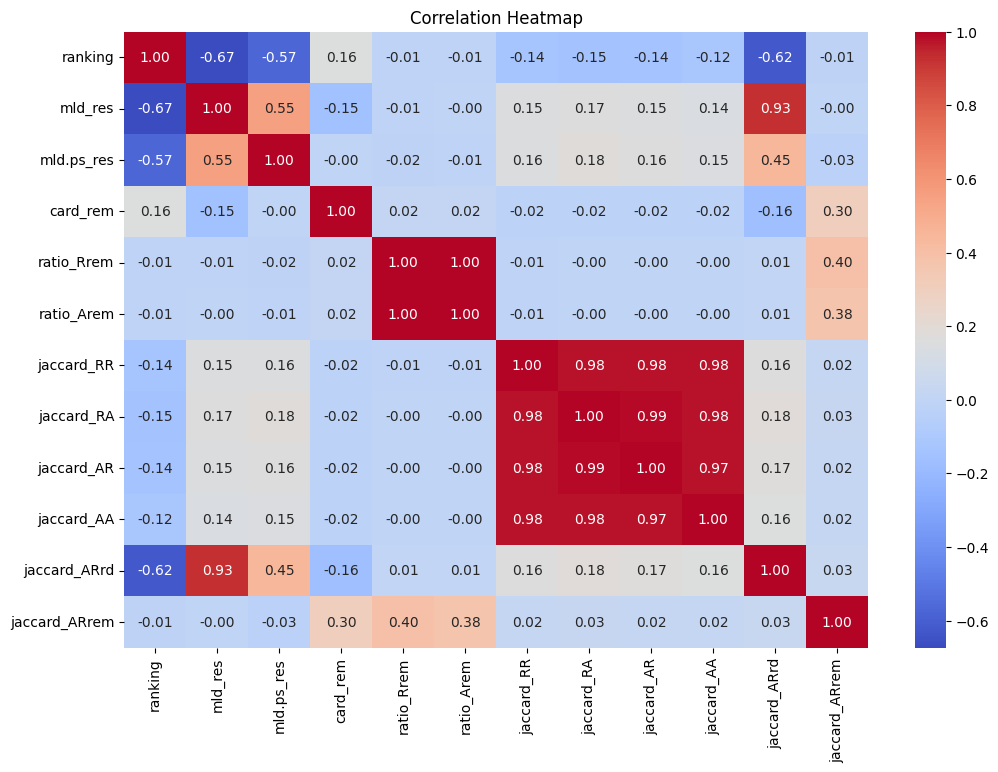

In [ ]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
# Select only the numerical columns for correlation calculation
numerical_data = data.select_dtypes(include=['number'])
correlation_matrix = numerical_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

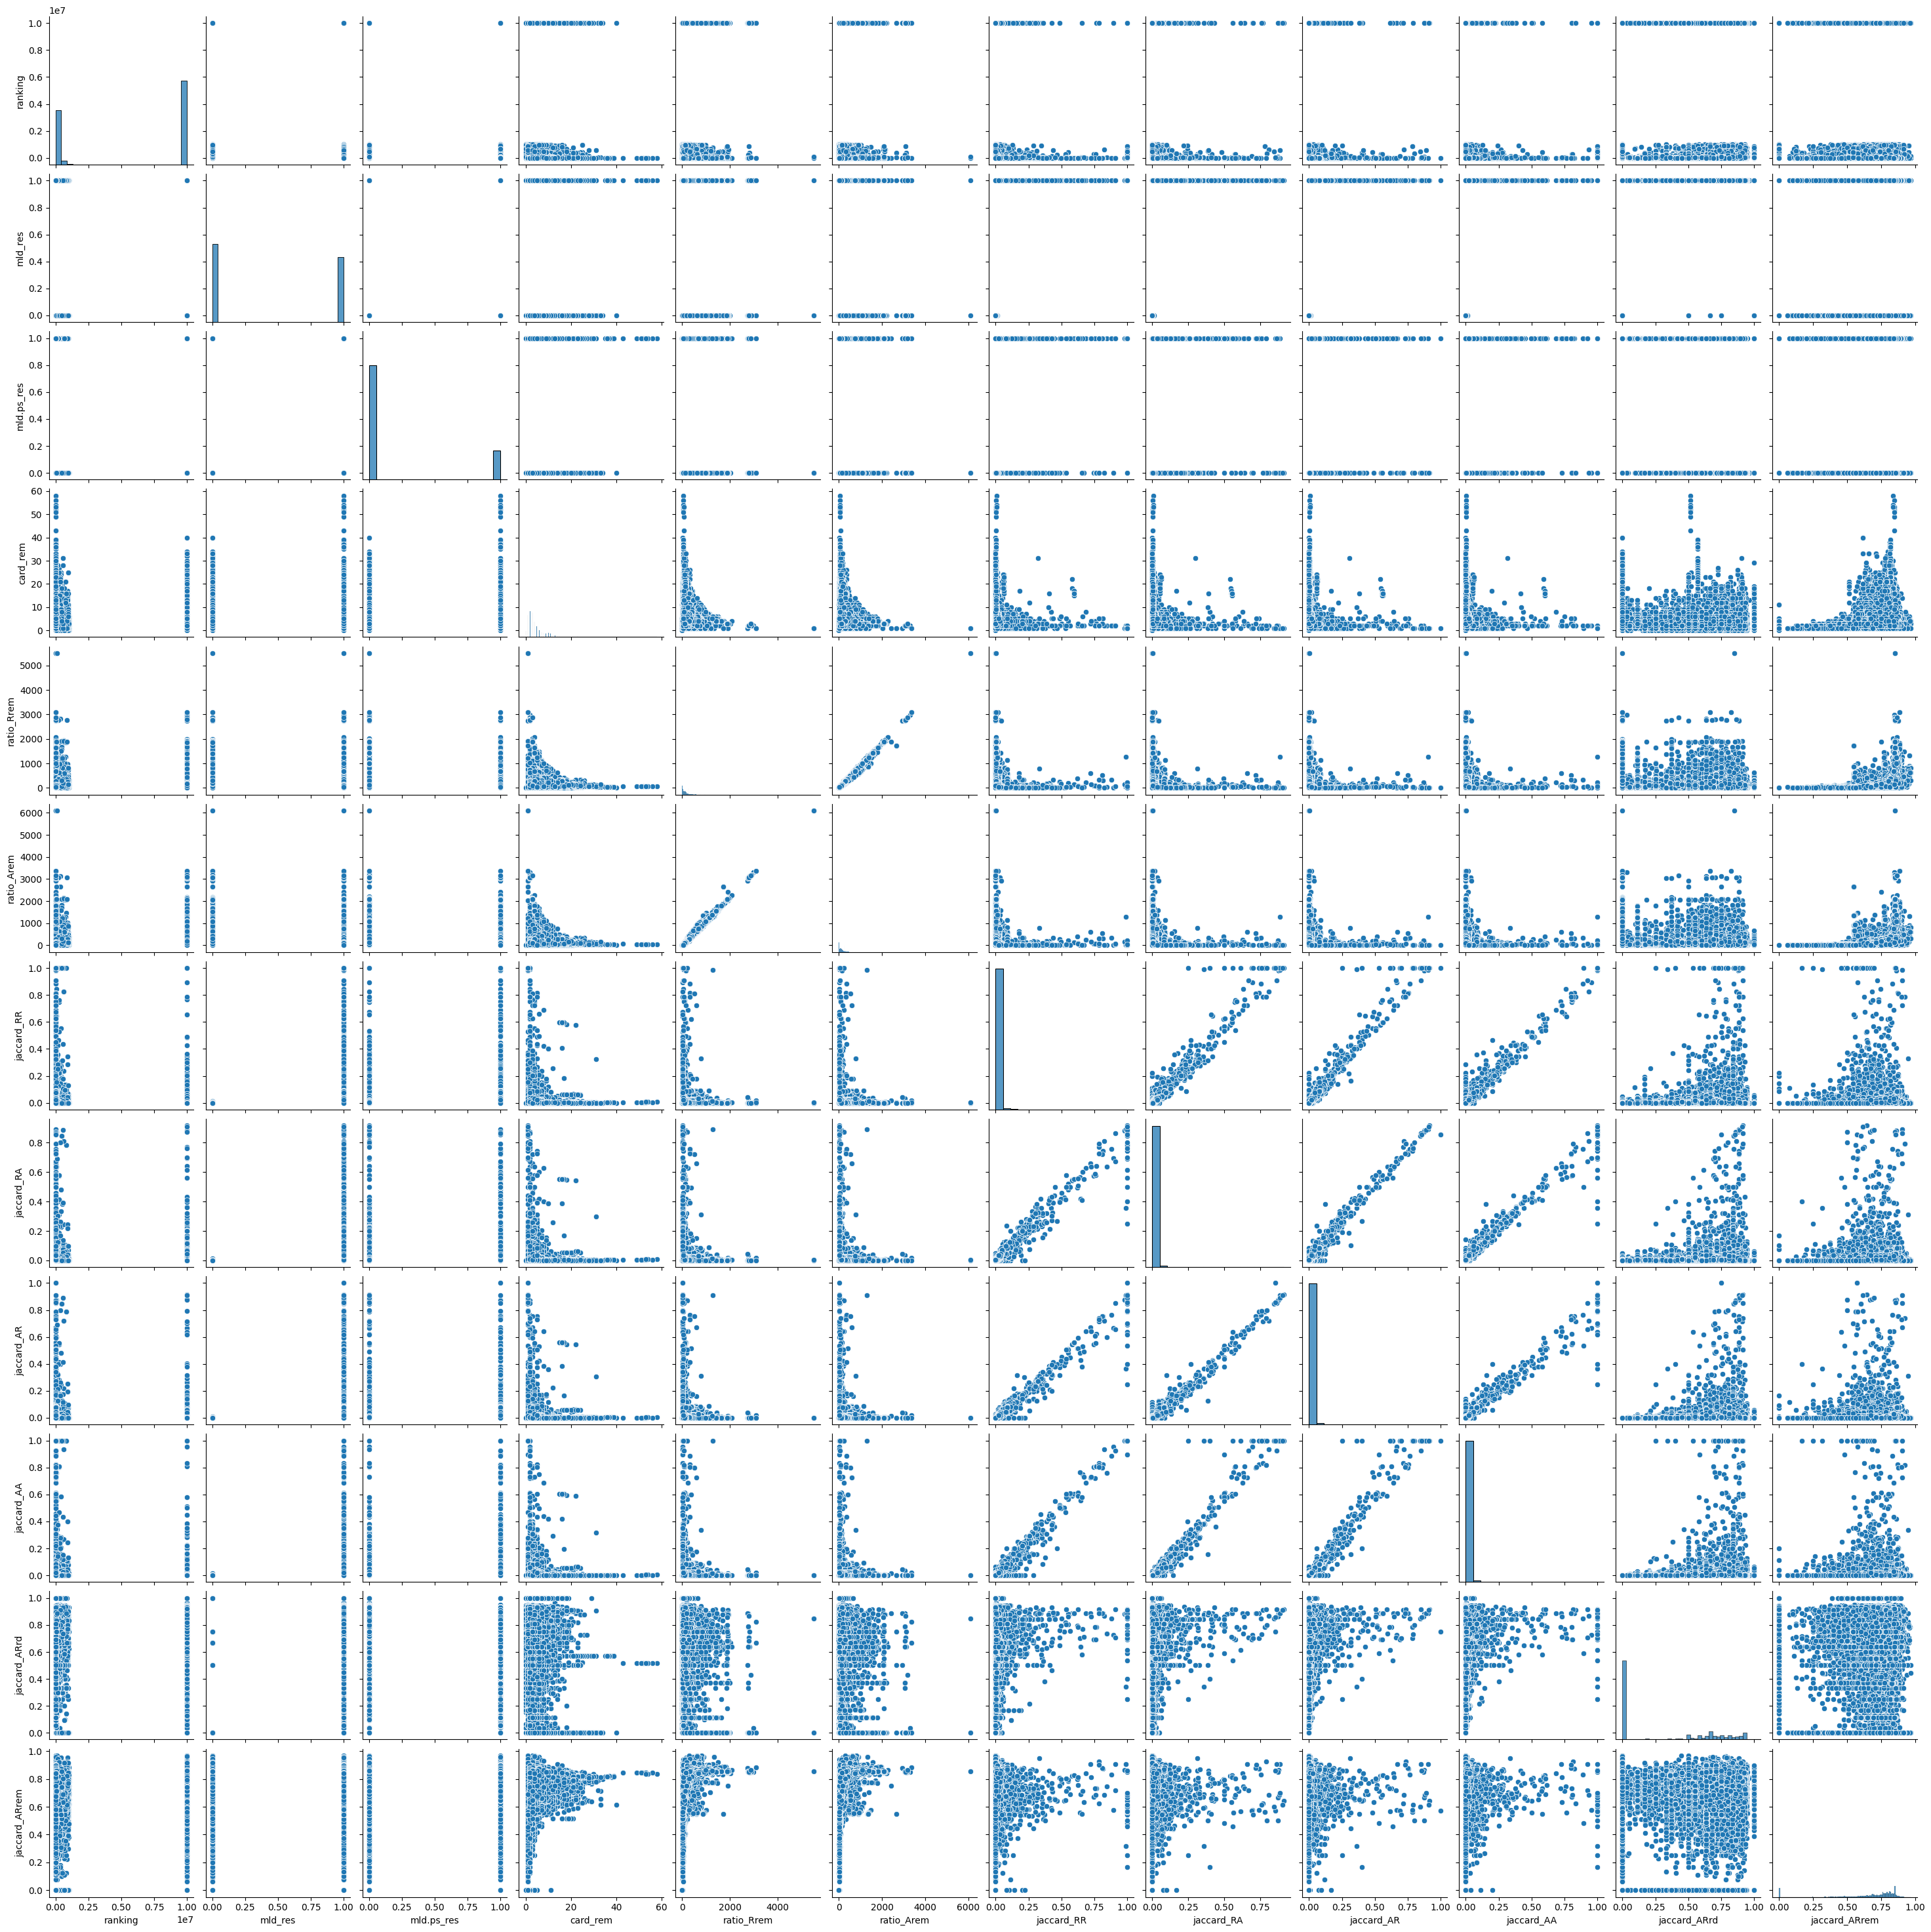

In [ ]:
# Pair plots
# Select only numerical columns for pair plots after dropping 'Unnamed: 14'
numerical_data = data.select_dtypes(include=['number'])
sns.pairplot(numerical_data)
plt.show()

In [ ]:
from sklearn import tree

In [ ]:
data

,domain,ranking,mld_res,mld.ps_res,card_rem,ratio_Rrem,ratio_Arem,jaccard_RR,jaccard_RA,jaccard_AR,jaccard_AA,jaccard_ARrd,jaccard_ARrem,label
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,10000000,1.0,0.0,18,107.611111,107.277778,0.000000,0.000000,0.000000,0.000000,0.800000,0.795729,phishing websites
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,10000000,0.0,0.0,11,150.636364,152.272727,0.000000,0.000000,0.000000,0.000000,0.000000,0.768577,phishing websites
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,10000000,0.0,0.0,14,73.500000,72.642857,0.000000,0.000000,0.000000,0.000000,0.000000,0.726582,phishing websites
3,mail.printakid.com/www.online.americanexpress....,10000000,0.0,0.0,6,562.000000,590.666667,0.000000,0.000000,0.000000,0.000000,0.000000,0.859640,phishing websites
4,thewhiskeydregs.com/wp-content/themes/widescre...,10000000,0.0,0.0,8,29.000000,24.125000,0.000000,0.000000,0.000000,0.000000,0.000000,0.748971,phishing websites
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95538,xbox360.ign.com/objects/850/850402.html,339,1.0,1.0,2,142.500000,141.000000,0.009009,0.009091,0.006536,0.006601,0.450980,0.846906,non-phishing websites
95539,games.teamxbox.com/xbox-360/1860/Dead-Space/,63029,1.0,0.0,3,114.000000,128.333333,0.002899,0.002577,0.002907,0.002584,0.750000,0.714623,non-phishing websites
95540,www.gamespot.com/xbox360/action/deadspace/,753,1.0,1.0,3,91.000000,101.333333,0.000000,0.003106,0.000000,0.000000,0.111111,0.648571,non-phishing websites
95541,en.wikipedia.org/wiki/Dead_Space_(video_game),6,1.0,1.0,4,682.000000,744.250000,0.033075,0.029412,0.030250,0.029145,0.809735,0.840323,non-phishing websites


In [ ]:
data.shape

(95543, 14)

In [ ]:
#convert the ranking column to float type
#data['ranking'] = data['ranking'].astype(float)
#handle potential NAN values which may result from this conversion
data['ranking'] = pd.to_numeric(data['ranking'], errors='coerce')
data.dropna(inplace=True)
data.isnull().sum()


domain           0
ranking          0
mld_res          0
mld.ps_res       0
card_rem         0
ratio_Rrem       0
ratio_Arem       0
jaccard_RR       0
jaccard_RA       0
jaccard_AR       0
jaccard_AA       0
jaccard_ARrd     0
jaccard_ARrem    0
label            0
dtype: int64

In [ ]:
data.isnull().sum()

domain           0
ranking          0
mld_res          0
mld.ps_res       0
card_rem         0
ratio_Rrem       0
ratio_Arem       0
jaccard_RR       0
jaccard_RA       0
jaccard_AR       0
jaccard_AA       0
jaccard_ARrd     0
jaccard_ARrem    0
label            0
dtype: int64

In [ ]:
y=data['label']

In [ ]:
y

0            phishing websites
1            phishing websites
2            phishing websites
3            phishing websites
4            phishing websites
                 ...          
95538    non-phishing websites
95539    non-phishing websites
95540    non-phishing websites
95541    non-phishing websites
95542    non-phishing websites
Name: label, Length: 95542, dtype: object

In [ ]:
X=data.drop(['domain','label'],axis=1)

In [ ]:
X= X.dropna()

In [ ]:
X

,ranking,mld_res,mld.ps_res,card_rem,ratio_Rrem,ratio_Arem,jaccard_RR,jaccard_RA,jaccard_AR,jaccard_AA,jaccard_ARrd,jaccard_ARrem
0,10000000.0,1.0,0.0,18,107.611111,107.277778,0.000000,0.000000,0.000000,0.000000,0.800000,0.795729
1,10000000.0,0.0,0.0,11,150.636364,152.272727,0.000000,0.000000,0.000000,0.000000,0.000000,0.768577
2,10000000.0,0.0,0.0,14,73.500000,72.642857,0.000000,0.000000,0.000000,0.000000,0.000000,0.726582
3,10000000.0,0.0,0.0,6,562.000000,590.666667,0.000000,0.000000,0.000000,0.000000,0.000000,0.859640
4,10000000.0,0.0,0.0,8,29.000000,24.125000,0.000000,0.000000,0.000000,0.000000,0.000000,0.748971
...,...,...,...,...,...,...,...,...,...,...,...,...
95538,339.0,1.0,1.0,2,142.500000,141.000000,0.009009,0.009091,0.006536,0.006601,0.450980,0.846906
95539,63029.0,1.0,0.0,3,114.000000,128.333333,0.002899,0.002577,0.002907,0.002584,0.750000,0.714623
95540,753.0,1.0,1.0,3,91.000000,101.333333,0.000000,0.003106,0.000000,0.000000,0.111111,0.648571
95541,6.0,1.0,1.0,4,682.000000,744.250000,0.033075,0.029412,0.030250,0.029145,0.809735,0.840323


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 95542 entries, 0 to 95542
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ranking        95542 non-null  float64
 1   mld_res        95542 non-null  float64
 2   mld.ps_res     95542 non-null  float64
 3   card_rem       95542 non-null  int64  
 4   ratio_Rrem     95542 non-null  float64
 5   ratio_Arem     95542 non-null  float64
 6   jaccard_RR     95542 non-null  float64
 7   jaccard_RA     95542 non-null  float64
 8   jaccard_AR     95542 non-null  float64
 9   jaccard_AA     95542 non-null  float64
 10  jaccard_ARrd   95542 non-null  float64
 11  jaccard_ARrem  95542 non-null  float64
dtypes: float64(11), int64(1)
memory usage: 9.5 MB


In [ ]:
data.shape

(95542, 14)

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 95542 entries, 0 to 95542
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ranking        95542 non-null  float64
 1   mld_res        95542 non-null  float64
 2   mld.ps_res     95542 non-null  float64
 3   card_rem       95542 non-null  int64  
 4   ratio_Rrem     95542 non-null  float64
 5   ratio_Arem     95542 non-null  float64
 6   jaccard_RR     95542 non-null  float64
 7   jaccard_RA     95542 non-null  float64
 8   jaccard_AR     95542 non-null  float64
 9   jaccard_AA     95542 non-null  float64
 10  jaccard_ARrd   95542 non-null  float64
 11  jaccard_ARrem  95542 non-null  float64
dtypes: float64(11), int64(1)
memory usage: 9.5 MB


In [ ]:
clf=tree.DecisionTreeClassifier(criterion='entropy',max_depth=3)

In [ ]:
clf

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [ ]:
clf=clf.fit(X,y)

In [ ]:
import pydotplus

In [ ]:

from IPython.display import Image

In [ ]:
dot_data=tree.export_graphviz(clf, feature_names=X.columns,
                              class_names=['phishing websites','non-phishing websites'],
                              filled=True,out_file=None)

In [ ]:
dot_data

'digraph Tree {\nnode [shape=box, style="filled", color="black", fontname="helvetica"] ;\nedge [fontname="helvetica"] ;\n0 [label="ranking <= 5499815.0\\nentropy = 1.0\\nsamples = 95542\\nvalue = [47859, 47683]\\nclass = phishing websites", fillcolor="#fffffe"] ;\n1 [label="card_rem <= 9.5\\nentropy = 0.726\\nsamples = 39640\\nvalue = [31628, 8012]\\nclass = phishing websites", fillcolor="#eca16b"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="ratio_Rrem <= 0.25\\nentropy = 0.624\\nsamples = 37275\\nvalue = [31466, 5809]\\nclass = phishing websites", fillcolor="#ea985e"] ;\n1 -> 2 ;\n3 [label="entropy = 0.895\\nsamples = 2322\\nvalue = [723, 1599]\\nclass = non-phishing websites", fillcolor="#93c9f1"] ;\n2 -> 3 ;\n4 [label="entropy = 0.531\\nsamples = 34953\\nvalue = [30743, 4210]\\nclass = phishing websites", fillcolor="#e99254"] ;\n2 -> 4 ;\n5 [label="card_rem <= 13.5\\nentropy = 0.36\\nsamples = 2365\\nvalue = [162, 2203]\\nclass = non-phishing websites

In [ ]:
graph=pydotplus.graph_from_dot_data(dot_data)

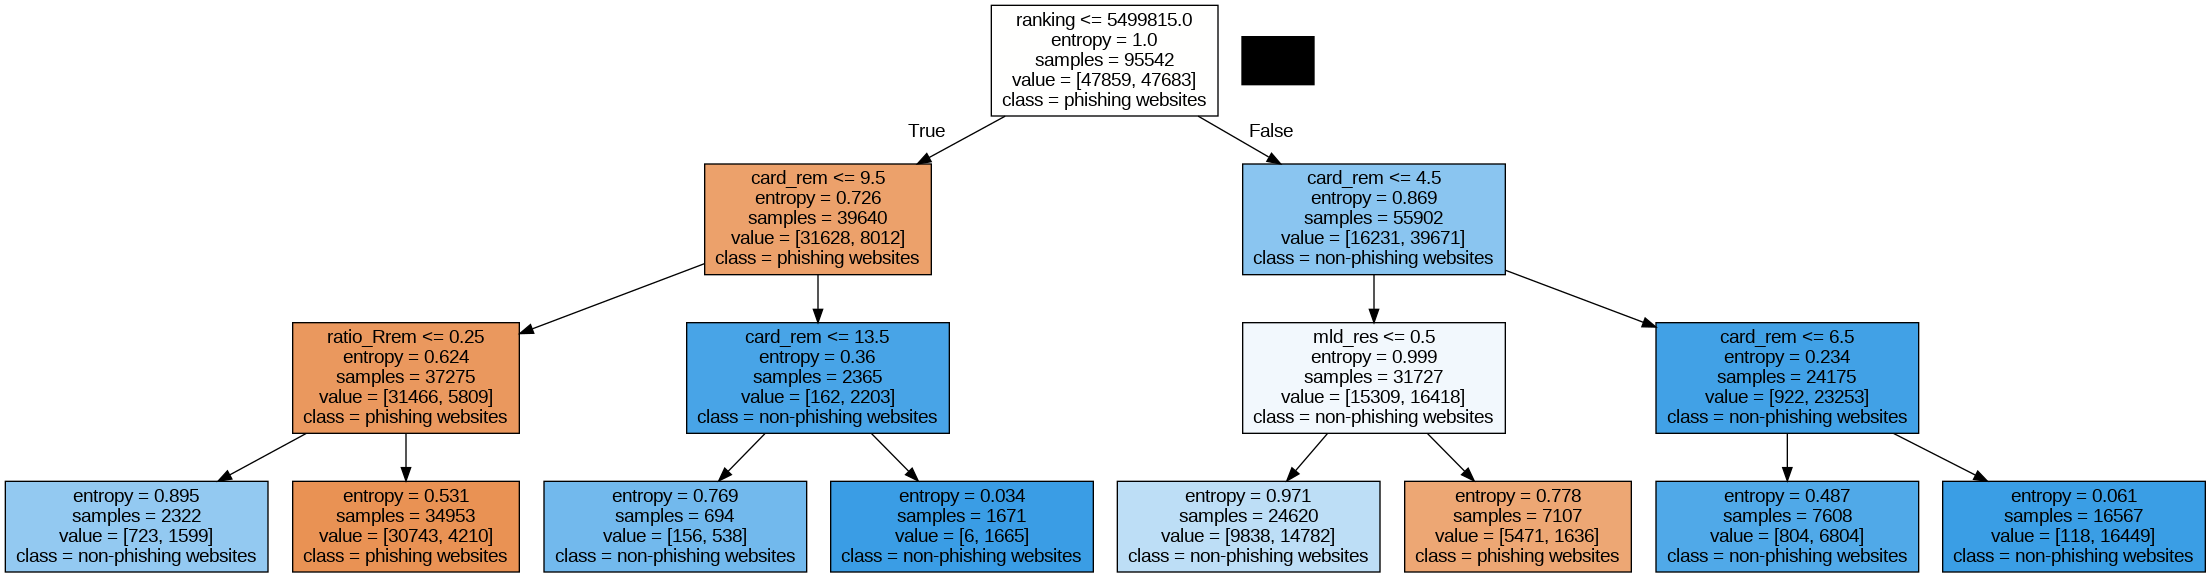

In [ ]:
graph


Image(graph.create_png())


In [ ]:
testData=[['mld.ps_res',0,0,0,0,1,1,'phishing'],
          ['samples', 1,0,0,0,1,1,'non-phishing'],
          ['mld_res', 1,0,0,1,1,0,'phishing'],
          ['card_rem',18,15,8,11,10,9,'non-phishing']]


testData

[['mld.ps_res', 0, 0, 0, 0, 1, 1, 'phishing'],
 ['samples', 1, 0, 0, 0, 1, 1, 'non-phishing'],
 ['mld_res', 1, 0, 0, 1, 1, 0, 'phishing'],
 ['card_rem', 18, 15, 8, 11, 10, 9, 'non-phishing']]

In [ ]:
data.columns

Index(['domain', 'ranking', 'mld_res', 'mld.ps_res', 'card_rem', 'ratio_Rrem',
       'ratio_Arem', 'jaccard_RR', 'jaccard_RA', 'jaccard_AR', 'jaccard_AA',
       'jaccard_ARrd', 'jaccard_ARrem', 'label'],
      dtype='object')

Doing the weigh and biases now

In [ ]:
pip install wandb

In [ ]:
import wandb

In [ ]:
import wandb
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np

In [ ]:
wandb.login()

True

In [ ]:
import wandb
import random

# start a new wandb run to track this script
wandb.init(
    # set the wandb project where this run will be logged
    project="Weight&BiasesProject",

    # track hyperparameters and run metadata
    config={
    "learning_rate": 0.02,
    "architecture": "CNN",
    "dataset": "CIFAR-100",
    "epochs": 10,
    }
)

# simulate training
epochs = 10
offset = random.random() / 5
for epoch in range(2, epochs):
    acc = 1 - 2 ** -epoch - random.random() / epoch - offset
    loss = 2 ** -epoch + random.random() / epoch + offset

    # log metrics to wandb
    wandb.log({"acc": acc, "loss": loss})

# [optional] finish the wandb run, necessary in notebooks
wandb.finish()

acc,▃▁▂▇█▆██
loss,█▆▃▂▂▂▁▁
acc,0.7889
loss,0.19603


In [ ]:
pip install pytorch

  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for pytorch
  Running setup.py clean for pytorch
Failed to build pytorch
ERROR: ERROR: Failed to build installable wheels for some pyproject.toml based projects (pytorch)


In [ ]:
pip install torchvision

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

In [ ]:
#@title
import wandb
import math
import random
import torch, torchvision
import torch.nn as nn
import torchvision.transforms as T

device = "cuda:0" if torch.cuda.is_available() else "cpu"

def get_dataloader(is_train, batch_size, slice=5):
    "Get a training dataloader"
    full_dataset = torchvision.datasets.MNIST(root=".", train=is_train, transform=T.ToTensor(), download=True)
    sub_dataset = torch.utils.data.Subset(full_dataset, indices=range(0, len(full_dataset), slice))
    loader = torch.utils.data.DataLoader(dataset=sub_dataset,
                                         batch_size=batch_size,
                                         shuffle=True if is_train else False,
                                         pin_memory=True, num_workers=2)
    return loader

def get_model(dropout):
    "A simple model"
    model = nn.Sequential(nn.Flatten(),
                         nn.Linear(28*28, 256),
                         nn.BatchNorm1d(256),
                         nn.ReLU(),
                         nn.Dropout(dropout),
                         nn.Linear(256,10)).to(device)
    return model

def validate_model(model, valid_dl, loss_func, log_images=False, batch_idx=0):
    "Compute performance of the model on the validation dataset and log a wandb.Table"
    model.eval()
    val_loss = 0.
    with torch.inference_mode():
        correct = 0
        for i, (images, labels) in enumerate(valid_dl):
            images, labels = images.to(device), labels.to(device)

            # Forward pass ➡
            outputs = model(images)
            val_loss += loss_func(outputs, labels)*labels.size(0)

            # Compute accuracy and accumulate
            _, predicted = torch.max(outputs.data, 1)
            correct += (predicted == labels).sum().item()

            # Log one batch of images to the dashboard, always same batch_idx.
            if i==batch_idx and log_images:
                log_image_table(images, predicted, labels, outputs.softmax(dim=1))
    return val_loss / len(valid_dl.dataset), correct / len(valid_dl.dataset)

def log_image_table(images, predicted, labels, probs):
    "Log a wandb.Table with (img, pred, target, scores)"
    # 🐝 Create a wandb Table to log images, labels and predictions to
    table = wandb.Table(columns=["image", "pred", "target"]+[f"score_{i}" for i in range(10)])
    for img, pred, targ, prob in zip(images.to("cpu"), predicted.to("cpu"), labels.to("cpu"), probs.to("cpu")):
        table.add_data(wandb.Image(img[0].numpy()*255), pred, targ, *prob.numpy())
    wandb.log({"predictions_table":table}, commit=False)

In [ ]:
# Launch 5 experiments, trying different dropout rates
for _ in range(5):
    # 🐝 initialise a wandb run
    wandb.init(
        project="pytorch-intro",
        config={
            "epochs": 10,
            "batch_size": 128,
            "lr": 1e-3,
            "dropout": random.uniform(0.01, 0.80),
            })

    # Copy your config
    config = wandb.config

    # Get the data
    train_dl = get_dataloader(is_train=True, batch_size=config.batch_size)
    valid_dl = get_dataloader(is_train=False, batch_size=2*config.batch_size)
    n_steps_per_epoch = math.ceil(len(train_dl.dataset) / config.batch_size)

    # A simple MLP model
    model = get_model(config.dropout)

    # Make the loss and optimizer
    loss_func = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=config.lr)

   # Training
    example_ct = 0
    step_ct = 0
    for epoch in range(config.epochs):
        model.train()
        for step, (images, labels) in enumerate(train_dl):
            images, labels = images.to(device), labels.to(device)

            outputs = model(images)
            train_loss = loss_func(outputs, labels)
            optimizer.zero_grad()
            train_loss.backward()
            optimizer.step()

            example_ct += len(images)
            metrics = {"train/train_loss": train_loss,
                       "train/epoch": (step + 1 + (n_steps_per_epoch * epoch)) / n_steps_per_epoch,
                       "train/example_ct": example_ct}

            if step + 1 < n_steps_per_epoch:
                # 🐝 Log train metrics to wandb
                wandb.log(metrics)

            step_ct += 1

        val_loss, accuracy = validate_model(model, valid_dl, loss_func, log_images=(epoch==(config.epochs-1)))

        # 🐝 Log train and validation metrics to wandb
        val_metrics = {"val/val_loss": val_loss,
                       "val/val_accuracy": accuracy}
        wandb.log({**metrics, **val_metrics})

        print(f"Train Loss: {train_loss:.3f}, Valid Loss: {val_loss:3f}, Accuracy: {accuracy:.2f}")

    # If you had a test set, this is how you could log it as a Summary metric
    wandb.summary['test_accuracy'] = 0.8

    # 🐝 Close your wandb run
    wandb.finish()

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 52727531.41it/s]


Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 2903261.76it/s]

Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 14097032.56it/s]


Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 1202684.90it/s]

Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



Train Loss: 0.261, Valid Loss: 0.283562, Accuracy: 0.92
Train Loss: 0.122, Valid Loss: 0.223900, Accuracy: 0.93
Train Loss: 0.145, Valid Loss: 0.208747, Accuracy: 0.94
Train Loss: 0.153, Valid Loss: 0.185857, Accuracy: 0.94
Train Loss: 0.130, Valid Loss: 0.167603, Accuracy: 0.95
Train Loss: 0.069, Valid Loss: 0.159961, Accuracy: 0.95
Train Loss: 0.095, Valid Loss: 0.156324, Accuracy: 0.95
Train Loss: 0.084, Valid Loss: 0.154122, Accuracy: 0.95
Train Loss: 0.027, Valid Loss: 0.159355, Accuracy: 0.95
Train Loss: 0.091, Valid Loss: 0.144103, Accuracy: 0.95


train/epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
train/example_ct,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
train/train_loss,█▄▃▃▃▄▃▂▂▂▁▂▁▁▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▂▁▁▁▁
val/val_accuracy,▁▃▅▅▆▇███▇
val/val_loss,█▅▄▃▂▂▂▂▂▁
test_accuracy,0.8
train/epoch,10.0
train/example_ct,120000
train/train_loss,0.09086
val/val_accuracy,0.9505
val/val_loss,0.1441


Train Loss: 0.313, Valid Loss: 0.321536, Accuracy: 0.91
Train Loss: 0.322, Valid Loss: 0.256349, Accuracy: 0.92
Train Loss: 0.294, Valid Loss: 0.224507, Accuracy: 0.93
Train Loss: 0.155, Valid Loss: 0.208725, Accuracy: 0.94
Train Loss: 0.211, Valid Loss: 0.194851, Accuracy: 0.94
Train Loss: 0.121, Valid Loss: 0.191245, Accuracy: 0.94
Train Loss: 0.207, Valid Loss: 0.182526, Accuracy: 0.94
Train Loss: 0.176, Valid Loss: 0.179227, Accuracy: 0.95
Train Loss: 0.132, Valid Loss: 0.171378, Accuracy: 0.95
Train Loss: 0.064, Valid Loss: 0.164878, Accuracy: 0.95


train/epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
train/example_ct,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
train/train_loss,█▄▄▃▂▃▂▂▁▂▂▂▂▂▂▂▂▂▂▂▂▁▂▁▂▁▁▁▁▂▂▂▁▁▁▂▁▁▁▁
val/val_accuracy,▁▄▅▆▇▇▇███
val/val_loss,█▅▄▃▂▂▂▂▁▁
test_accuracy,0.8
train/epoch,10.0
train/example_ct,120000
train/train_loss,0.06391
val/val_accuracy,0.9485
val/val_loss,0.16488


Train Loss: 0.399, Valid Loss: 0.288185, Accuracy: 0.91
Train Loss: 0.182, Valid Loss: 0.222496, Accuracy: 0.94
Train Loss: 0.172, Valid Loss: 0.193161, Accuracy: 0.94
Train Loss: 0.063, Valid Loss: 0.181131, Accuracy: 0.94
Train Loss: 0.164, Valid Loss: 0.170267, Accuracy: 0.95
Train Loss: 0.144, Valid Loss: 0.163963, Accuracy: 0.95
Train Loss: 0.078, Valid Loss: 0.154994, Accuracy: 0.95
Train Loss: 0.055, Valid Loss: 0.147991, Accuracy: 0.95
Train Loss: 0.059, Valid Loss: 0.148794, Accuracy: 0.96
Train Loss: 0.033, Valid Loss: 0.152707, Accuracy: 0.95


train/epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
train/example_ct,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
train/train_loss,█▅▄▄▃▃▂▃▂▂▃▂▂▁▂▂▂▁▂▁▂▁▂▁▁▁▂▂▁▁▁▁▁▁▁▁▁▁▁▁
val/val_accuracy,▁▅▆▆▇▇▇▇██
val/val_loss,█▅▃▃▂▂▁▁▁▁
test_accuracy,0.8
train/epoch,10.0
train/example_ct,120000
train/train_loss,0.03319
val/val_accuracy,0.9545
val/val_loss,0.15271


Train Loss: 0.231, Valid Loss: 0.311198, Accuracy: 0.92
Train Loss: 0.136, Valid Loss: 0.251195, Accuracy: 0.93
Train Loss: 0.193, Valid Loss: 0.226911, Accuracy: 0.93
Train Loss: 0.224, Valid Loss: 0.201387, Accuracy: 0.94
Train Loss: 0.239, Valid Loss: 0.192305, Accuracy: 0.94
Train Loss: 0.169, Valid Loss: 0.183322, Accuracy: 0.94
Train Loss: 0.126, Valid Loss: 0.175994, Accuracy: 0.94
Train Loss: 0.149, Valid Loss: 0.172035, Accuracy: 0.94
Train Loss: 0.114, Valid Loss: 0.161472, Accuracy: 0.94
Train Loss: 0.239, Valid Loss: 0.163267, Accuracy: 0.95


train/epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
train/example_ct,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
train/train_loss,█▅▄▄▃▂▃▄▂▂▂▂▂▂▂▂▂▂▃▂▂▁▂▁▁▁▁▂▁▁▁▁▁▁▂▁▁▁▁▁
val/val_accuracy,▁▄▅▅▆▇▇▇▇█
val/val_loss,█▅▄▃▂▂▂▁▁▁
test_accuracy,0.8
train/epoch,10.0
train/example_ct,120000
train/train_loss,0.23915
val/val_accuracy,0.9485
val/val_loss,0.16327


Train Loss: 0.522, Valid Loss: 0.315507, Accuracy: 0.91
Train Loss: 0.304, Valid Loss: 0.254023, Accuracy: 0.92
Train Loss: 0.135, Valid Loss: 0.229361, Accuracy: 0.93
Train Loss: 0.178, Valid Loss: 0.210081, Accuracy: 0.94
Train Loss: 0.120, Valid Loss: 0.201850, Accuracy: 0.94
Train Loss: 0.108, Valid Loss: 0.186439, Accuracy: 0.94
Train Loss: 0.128, Valid Loss: 0.180145, Accuracy: 0.94
Train Loss: 0.197, Valid Loss: 0.177585, Accuracy: 0.95
Train Loss: 0.097, Valid Loss: 0.176857, Accuracy: 0.94
Train Loss: 0.154, Valid Loss: 0.169700, Accuracy: 0.94


train/epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
train/example_ct,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
train/train_loss,█▆▄▃▃▂▃▃▂▂▃▂▂▃▃▂▂▂▂▂▂▂▂▂▂▁▂▁▂▁▁▂▁▁▁▂▂▁▁▂
val/val_accuracy,▁▄▆▆▆█▇█▇█
val/val_loss,█▅▄▃▃▂▂▁▁▁
test_accuracy,0.8
train/epoch,10.0
train/example_ct,120000
train/train_loss,0.15371
val/val_accuracy,0.9445
val/val_loss,0.1697
